In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path_dataset = f"{getcwd()}/../content/drive/MyDrive/dataset"

In [ ]:
path_dataset

'/content/../content/drive/MyDrive/dataset'

In [ ]:
import os

donuts = os.path.join('/content/drive/MyDrive/dataset/donuts')
fries = os.path.join('/content/drive/MyDrive/dataset/fries')
noodles = os.path.join('/content/drive/MyDrive/dataset/noodles')
pizza = os.path.join('/content/drive/MyDrive/dataset/pizza')
samosa = os.path.join('/content/drive/MyDrive/dataset/samosa')
 
print('Total donuts Images:',len(os.listdir(donuts)))
print('Total fries Images:',len(os.listdir(fries)))
print('Total noodles Images:',len(os.listdir(noodles)))
print('Total pizza Images:',len(os.listdir(pizza)))
print('Total samosa Images:',len(os.listdir(samosa)))




Total donuts Images: 1150
Total fries Images: 1000
Total noodles Images: 1000
Total pizza Images: 1000
Total samosa Images: 1000


In [ ]:
from glob import glob
import os.path
from shutil import copy2

path = '/content/drive/MyDrive/dataset'
test = '/content/drive/MyDrive/Test'
train = '/content/drive/MyDrive/Train'

if not os.path.exists(test):
	os.makedirs(test)
if not os.path.exists(train):
	os.makedirs(train)
 
for folder in glob(path+'/*'):
		print(folder)
		# find number of images in folder
		no_images_in_folder = len(os.listdir(folder))
		# make new folder inside test and train
		folder_test = test+'/'+folder.split('/')[5]+'/'
		folder_train = train+'/'+folder.split('/')[5]+'/'
		#print(folder_test)
		# print(folder_train)
		if not os.path.exists(folder_test):
			os.makedirs(folder_test)
		if not os.path.exists(folder_train):
			os.makedirs(folder_train)

		print("no of images in this folder: {}".format(no_images_in_folder))
		train_num = int(no_images_in_folder*0.8)
		
		# iterate from 0..test and copy to test
		# iterate test to end and copy to train
		for idx, im in enumerate(glob(folder+'/*')):
			#print(im)
			if idx <= train_num:
			# copy to test
				copy2(im, folder_train)
			else:
			# copy to train
				copy2(im, folder_test)

/content/drive/MyDrive/dataset/samosa
no of images in this folder: 1000
/content/drive/MyDrive/dataset/donuts
no of images in this folder: 1150
/content/drive/MyDrive/dataset/pizza
no of images in this folder: 1000
/content/drive/MyDrive/dataset/noodles
no of images in this folder: 1000
/content/drive/MyDrive/dataset/fries
no of images in this folder: 1000


In [ ]:
# Define our example directories and files
train_dir = '/content/drive/MyDrive/Train'
validation_dir = '/content/drive/MyDrive/Test'

train_donuts_dir = os.path.join(train_dir,'donuts')
train_fries_dir = os.path.join(train_dir,'fries')
train_noodles_dir = os.path.join(train_dir,'noodles')
train_pizza_dir = os.path.join(train_dir,'pizza')
train_samosa_dir = os.path.join(train_dir,'samosa')
validation_donuts_dir = os.path.join(validation_dir,'donuts')
validation_fries_dir = os.path.join(validation_dir,'fries')
validation_noodles_dir = os.path.join(validation_dir,'noodles')
validation_pizza_dir = os.path.join(validation_dir,'pizza')
validation_samosa_dir = os.path.join(validation_dir,'samosa')

train_donuts_fnames = os.listdir(train_donuts_dir)
train_fries_fnames = os.listdir(train_fries_dir)
train_noodles_fnames = os.listdir(train_noodles_dir)
train_pizza_fnames = os.listdir(train_pizza_dir)
train_samosa_fnames = os.listdir(train_samosa_dir)
validation_donuts_fnames = os.listdir(validation_donuts_dir)
validation_fries_fnames = os.listdir(validation_fries_dir)
validation_noodles_fnames = os.listdir(validation_noodles_dir)
validation_pizza_fnames = os.listdir(validation_pizza_dir)
validation_samosa_fnames = os.listdir(validation_samosa_dir)

print(len(train_donuts_fnames))
print(len(train_fries_fnames))
print(len(train_noodles_fnames))
print(len(train_pizza_fnames))
print(len(train_samosa_fnames))
 
print(len(validation_donuts_fnames))
print(len(validation_fries_fnames))
print(len(validation_noodles_fnames))
print(len(validation_pizza_fnames))
print(len(validation_samosa_fnames))
 

921
801
801
801
801
229
199
199
199
199


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

 
test_datagen = ImageDataGenerator(rescale=1/255)

 
train_generator = train_datagen.flow_from_directory(train_dir,   
        target_size=(224,224), 
        batch_size=20,
        class_mode='categorical')

 
validation_generator =  test_datagen.flow_from_directory( validation_dir,  # This is the source directory for training images
        target_size=(224,224), 
        batch_size=20,
        class_mode='categorical')

Found 4125 images belonging to 5 classes.
Found 1025 images belonging to 5 classes.


In [ ]:
label_map = (train_generator.class_indices)

In [ ]:
print(label_map)

{'donuts': 0, 'fries': 1, 'noodles': 2, 'pizza': 3, 'samosa': 4}


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import ResNet50
# model = InceptionV3(input_shape = (150,150,3),
#                                include_top  = False,
#                                weights      = None)

# model =  MobileNetV2(
#     input_shape=(150,150,3), alpha=1.0, include_top=False, weights='imagenet',
#     input_tensor=None, pooling=None, classes=1000,
#     classifier_activation='softmax' 
# )

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3),pooling='max')

res_name = []
for layer in resnet.layers:
    res_name.append(layer.name)

# set_trainable = False
# for layer in resnet.layers:
#     if layer.name in res_name[-22:]:
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

for layer in resnet.layers:
      layer.trainable = True

resnet.summary()

94781440/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = 5

model = Sequential()
model.add(resnet)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0

In [ ]:
!pip install tensorflow_addons
import tensorflow_addons as tfa
rms = tf.keras.optimizers.RMSprop(
    learning_rate=0.0001)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = rms, loss = 'categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=num_classes)])

     |████████████████████████████████| 1.1 MB 11.4 MB/s 


In [ ]:
import numpy as np 
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99.0% accuracy so cancelling training!")
            self.model.stop_training = True 

callbacks = myCallback()

history = model.fit_generator(train_generator,
                              steps_per_epoch= int(4125/25),
                              epochs = 25, 
                              validation_steps= int(1025/25),
                              validation_data = validation_generator,
                              callbacks=[callbacks]                  
                              )
                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/25
165/165 [==============================] - 166s 805ms/step - loss: 1.6289 - accuracy: 0.5958 - f1_score: 0.5954 - val_loss: 4.0819 - val_accuracy: 0.2268 - val_f1_score: 0.0740
Epoch 2/25
165/165 [==============================] - 133s 807ms/step - loss: 0.6097 - accuracy: 0.8164 - f1_score: 0.8161 - val_loss: 2.0424 - val_accuracy: 0.1988 - val_f1_score: 0.0663
Epoch 3/25
165/165 [==============================] - 134s 810ms/step - loss: 0.4697 - accuracy: 0.8615 - f1_score: 0.8621 - val_loss: 1.8503 - val_accuracy: 0.2756 - val_f1_score: 0.1702
Epoch 4/25
165/165 [==============================] - 132s 798ms/step - loss: 0.4144 - accuracy: 0.8864 - f1_score: 0.8869 - val_loss: 2.6067 - val_accuracy: 0.4549 - val_f1_score: 0.4184
Epoch 5/25
165/165 [==============================] - 132s 798ms/step - loss: 0.4200 - accuracy: 0.8895 - f1_score: 0.8896 - val_loss: 1.3620 - val_accuracy: 0.7280 - val_f1_score: 0.7267
Epoch 6/25
165/165 [==============================] - 132s 7

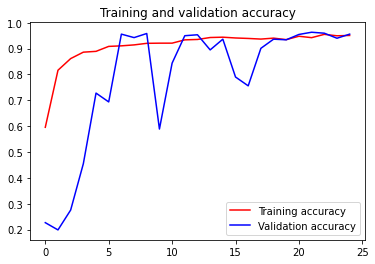

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

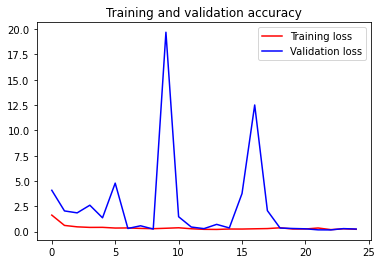

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save_weights('resnet_model_weights.h5')
model.save('resnet_model.h5')